### cuurent best score - 0.50357
#### Next steps:
1. find out days of week weeks and use them
2. use registered and casual columns try to infer something form them
3. lets try predicting value of windspeed of column with value 0.0

#### Important things used in this:
1. Seaborn plots
2. Extracting information from datetime column
3. using numpy vectorizer function
4. using dummies for categorical columns

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True,style="ticks")

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
print("Train shape : {}, Test Shape : {}".format(train.shape,test.shape))

Train shape : (10886, 12), Test Shape : (6493, 9)


Text(0.5,1,'Holiday vs Working Day Count')

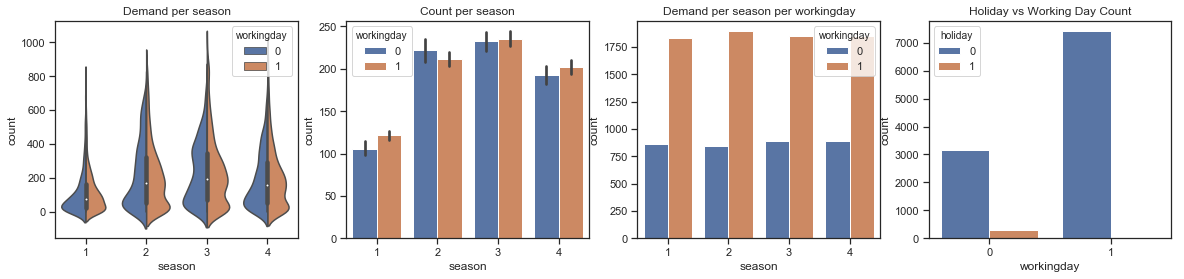

In [4]:
fig,ax = plt.subplots(figsize=(20,4),ncols=4,nrows=1)
sns.violinplot(x="season",y="count",hue="workingday",split=True,data=train,ax=ax[0]).set_title("Demand per season")
sns.barplot(x="season",y="count",hue="workingday",dodge=True,data=train,ax=ax[1]).set_title("Count per season")
sns.countplot(x="season",hue="workingday",dodge=True,data=train,ax=ax[2]).set_title("Demand per season per workingday")
sns.countplot(x="workingday",hue="holiday",dodge=True,data=train,ax=ax[3]).set_title("Holiday vs Working Day Count")

### Conclusion
1. Dataset contain nearly equal samples for all season
2. there are less holiday samples
3. Instead of it demand is equal to aggragate of workingday means holiday has great demand of bicycles
4. season 1 has less demand compared to rest of the seasons 

## Lets try with season1 = 0 or 1 also because season 2,3,4 doesnt seems to make much difference on count

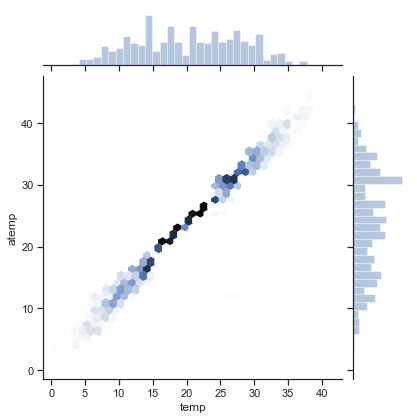

In [5]:
sns.jointplot(x="temp",y="atemp",kind="hex",data=train)

### Conclusion
1. temp = actual temp
2. atemp = feels like temp
3. Lower temprature are felt to be more temperature that original temp or people feel cold less
## There is not much differnce between atemp & temp, lets try both for prediction 

temp-atemp correlation : 0.9849481104817072
temp-count correlation : 0.39445364496724933
atemp-count correlation : 0.3897844366269766
windspeed-count correlation : 0.10136947021033277


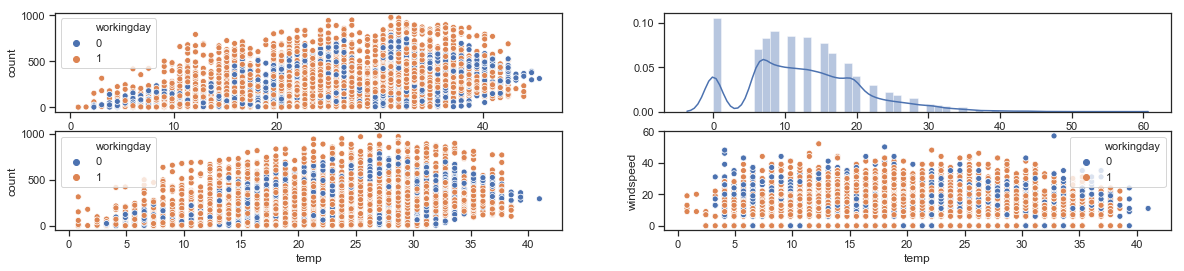

In [6]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=2)
sns.scatterplot(x="atemp",y="count",hue="workingday",data=train,ax=ax[0][0])
sns.distplot(train["windspeed"],ax=ax[0][1])
sns.scatterplot(x="temp",y="count",hue="workingday",data=train,ax=ax[1][0])
sns.scatterplot(x="temp",y="windspeed",hue="workingday",data=train,ax=ax[1][1])
print("temp-atemp correlation : {}".format(train['temp'].corr(train['atemp'])))
print("temp-count correlation : {}".format(train['temp'].corr(train['count'])))
print("atemp-count correlation : {}".format(train['atemp'].corr(train['count'])))
print("windspeed-count correlation : {}".format(train['windspeed'].corr(train['count'])))

### Conclusion
1. temp between 20-30 likely to have higher count 
2. windspeed have less correlation with count
3. temp have higher correlation with atemp, lets try both 

## Try with and without windspeed for prediction as it doesn't have, much correlation

In [7]:
"""
Lets utilize datetime columns also
as it gives information about time of booking
Lets create new information giving information about current hour
"""
import datetime
def getHour(dt):
    dt = datetime.datetime.strptime(dt, '%Y-%m-%d %H:%M:%S')
    return int(dt.strftime('%H'))
def getMonth(dt):
    dt = datetime.datetime.strptime(dt, '%Y-%m-%d %H:%M:%S')
    return int(dt.strftime('%m'))
#vectorizer is used to perform operation on whole numpy array
vectorizer = np.vectorize(getHour)
train['hour'] = vectorizer(train['datetime'].values)
train['month']  = np.vectorize(getMonth)(train['datetime'].values)
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1


In [8]:
"""Lets create one more variable time of the day"""
def getTime(hour):
    if hour<6:
        return "midnight"
    elif hour<10:
        return "morning"
    elif hour<17:
        return "noon"
    elif hour<23:
        return "night"
    else:
        return "midnight"
vectorizer = np.vectorize(getTime)
train['time'] = vectorizer(train['hour'].values)
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,midnight
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,midnight
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,midnight


season-month correlation : 0.9715237996323932


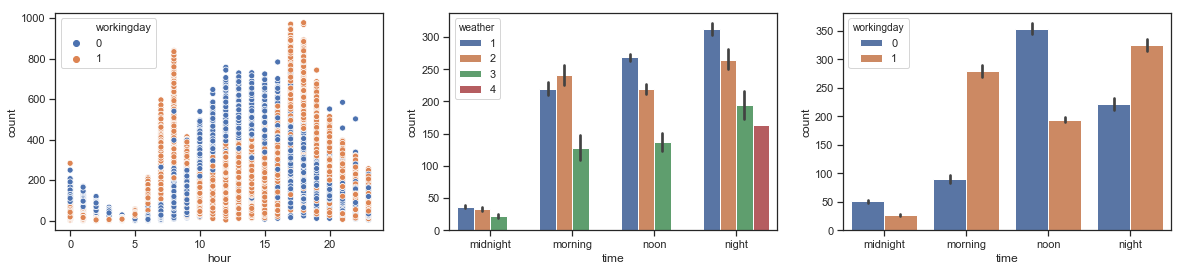

In [9]:
"""Lets visualize Hour variable"""
fig,ax = plt.subplots(figsize=(20,4),ncols=3,nrows=1)

sns.scatterplot(x="hour",y="count",hue="workingday",data=train,ax=ax[0])
sns.barplot(x="time",y="count",hue="weather",data=train,ax=ax[1])
sns.barplot(x="time",y="count",hue="workingday",data=train,ax=ax[2])
print("season-month correlation : {}".format(train['season'].corr(train['month'])))

### Conclusion
1. High Correlation between month and season, lets tryuse season only
2. Low demand during midnight, high demand at all time except midnight for non workinday
3. High demand during morning for working day, may be people going to work
4. High demand during night for working day, may be people returning from work
5. High demand during noon for non working day, may be people go to outing.

## Discard month, hour  and use only time

In [10]:
#check for null values
print("NA Values")
for col in train.columns:
    lna = len(train[train[col].isna()])
    print("{} : {}".format(col,lna))

NA Values
datetime : 0
season : 0
holiday : 0
workingday : 0
weather : 0
temp : 0
atemp : 0
humidity : 0
windspeed : 0
casual : 0
registered : 0
count : 0
hour : 0
month : 0
time : 0


In [11]:
test['hour'] = np.vectorize(getHour)(test['datetime'])
test['time'] = np.vectorize(getTime)(test['hour'])
test['month'] = np.vectorize(getMonth)(test['datetime'])
test.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,time,month
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,midnight,1
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,midnight,1


In [12]:
train.drop(['season','registered','casual'],axis=1,inplace=True)

In [13]:
Y = train['count']
df = train.append(test,sort=False,ignore_index=True)
df.head(2)

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month,time,season
0,2011-01-01 00:00:00,0,0,1,9.84,14.395,81,0.0,16.0,0,1,midnight,NaN
1,2011-01-01 01:00:00,0,0,1,9.02,13.635,80,0.0,40.0,1,1,midnight,NaN


In [14]:
df.drop(['time','season','count'],axis=1,inplace=True)
#OneHotEncoding Categorical Variables
df = pd.get_dummies(df,columns=['month','hour','weather'],prefix_sep='_')
df['humidity'] = df['humidity'].astype('float')

In [15]:
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler
scaler = MinMaxScaler()
df['temp'] = scaler.fit_transform(df['temp'].values.reshape(-1,1)).reshape(1,-1)[0]
df['atemp'] = scaler.fit_transform(df['atemp'].values.reshape(-1,1)).reshape(1,-1)[0]
df['windspeed'] = scaler.fit_transform(df['windspeed'].values.reshape(-1,1)).reshape(1,-1)[0]
df['humidity'] = scaler.fit_transform(df['humidity'].values.reshape(-1,1)).reshape(1,-1)[0]
df.head(3)

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,month_1,month_2,month_3,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,0.224490,0.2879,0.81,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,0.204082,0.2727,0.80,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,0.204082,0.2727,0.80,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
#df.drop("atemp",axis=1,inplace=True)
#df.drop("holiday",axis=1,inplace=True) #gives less accuracy
X = df[:len(train)].drop("datetime",axis=1)
X_test_datetime = df[len(train):].datetime
X_test = df[len(train):].drop("datetime",axis=1)

In [17]:
#train test split 0.25
from sklearn.model_selection import train_test_split
X_train,X_validation,Y_train,Y_validation = train_test_split(X,Y,test_size=0.20)

### Lets try following models
1. SGD Regression
2. svm.SVR
3. XGBoost Regressor
4. LightGBM Regressor
5. Keras NN

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [19]:
#1. SGD Regression 78.80
from sklearn.linear_model import SGDRegressor
sgdregressor = SGDRegressor(max_iter=1000)
sgdregressor.fit(X_train,Y_train)
mean_absolute_error(Y_validation,sgdregressor.predict(X_validation))

79.710766892922507

In [20]:
#2. SVR 91.936
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,Y_train)
mean_absolute_error(Y_validation,svr.predict(X_validation))

126.88274098302455

In [21]:
#XGBRegressor 50.631
from xgboost import XGBRegressor
param_grid = {
    'max_depth':[5,7,10],
    'n_estimators':[90,100,130],
    'learning_rate':[0.05]
}
gscv = GridSearchCV(XGBRegressor(),param_grid=param_grid)
gscv.fit(X_train,Y_train)
best_xgb = gscv.best_estimator_
print(best_xgb)
mean_absolute_error(Y_validation,best_xgb.predict(X_validation))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=130,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


50.618388091784425

In [22]:
#LightGBM Regressor 48.28
from lightgbm import LGBMRegressor
param_grid = {
    'num_leaves':[35,40,50],
    'max_depth':[-1],
    'n_estimators':[160,170,180],
    'learning_rate':[0.05]
}
gscv = GridSearchCV(LGBMRegressor(n_jobs=-1),param_grid=param_grid)
gscv.fit(X_train,Y_train)
best_lgbm = gscv.best_estimator_
print(best_lgbm)
mean_absolute_error(Y_validation,best_lgbm.predict(X_validation))

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.05, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=180,
       n_jobs=-1, num_leaves=50, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)


48.495941813043608

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.wrappers.scikit_learn import KerasRegressor

nnmodel = Sequential()
nnmodel.add(Dense(1028,activation='relu',input_shape=(46,)))
nnmodel.add(Dropout(0.2))
nnmodel.add(Dense(524,activation='relu'))
nnmodel.add(Dropout(0.2))
nnmodel.add(Dense(128,activation='relu'))
nnmodel.add(Dropout(0.2))
nnmodel.add(Dense(1,activation='linear'))

nnmodel.compile(loss="mean_squared_error",optimizer="adam",metrics=['mean_absolute_error'])

epochs = 20
batch_size=8

nnmodel.fit(
    x=X_train,y=Y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_validation,Y_validation),
    verbose=2
)

Using TensorFlow backend.


Train on 8708 samples, validate on 2178 samples
Epoch 1/20
 - 20s - loss: 11829.5930 - mean_absolute_error: 72.8959 - val_loss: 8506.7703 - val_mean_absolute_error: 61.6454
Epoch 2/20
 - 19s - loss: 6718.2647 - mean_absolute_error: 55.3922 - val_loss: 6416.4800 - val_mean_absolute_error: 52.4021
Epoch 3/20
 - 19s - loss: 6419.6603 - mean_absolute_error: 53.8646 - val_loss: 6882.0462 - val_mean_absolute_error: 53.9119
Epoch 4/20
 - 19s - loss: 6113.7406 - mean_absolute_error: 52.4915 - val_loss: 6699.2576 - val_mean_absolute_error: 55.0563
Epoch 5/20
 - 19s - loss: 6098.7498 - mean_absolute_error: 52.2217 - val_loss: 5967.4147 - val_mean_absolute_error: 50.8076
Epoch 6/20
 - 19s - loss: 5888.0534 - mean_absolute_error: 50.9957 - val_loss: 7017.7635 - val_mean_absolute_error: 52.1781
Epoch 7/20
 - 19s - loss: 5873.3476 - mean_absolute_error: 51.0211 - val_loss: 7125.8154 - val_mean_absolute_error: 53.6578
Epoch 8/20
 - 19s - loss: 5764.8054 - mean_absolute_error: 50.4799 - val_loss: 5743

In [26]:
nnmodel.fit(x=X,y=Y,batch_size=batch_size,epochs=epochs,verbose=0)

In [27]:
pred = nnmodel.predict(X_test)
pred = pred.reshape(1,-1)[0]
pred[:10]

array([  29.11745071,    8.7207737 ,    5.63004303,    4.29031277,
          3.88297129,   14.21607399,   70.75076294,  148.46748352,
        378.45825195,  171.47399902], dtype=float32)

## FInal Conclusions
1. hour proved to be working great than time
2. using months instead of seasons
3. using atemp and temp both
4. using workingday and holiday both

In [28]:
result = pd.DataFrame({
    'datetime':X_test_datetime.values,
    'count':np.ceil(np.abs(pred))
})
result.to_csv('sol.csv',index=False)